In [20]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
#import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4
import warnings
warnings.filterwarnings('ignore')

d:\Git\Jupyternotebooks


In [2]:
d={"A":7, 'B':9,'C':12}
d1={'A':5, 'B':11,'C':15}
data=[d,d1]

df=pd.DataFrame(data=data)
df

,A,B,C
0,7,9,12
1,5,11,15


In [6]:
d={'AB':np.random.rand(10),'BC':np.random.randint(10,100,10)}

df=pd.DataFrame(data=d)
df

,AB,BC
0,0.641070,36
1,0.061759,44
2,0.660407,92
3,0.621091,87
4,0.951029,98
5,0.873121,76
6,0.780311,85
7,0.493269,82
8,0.282623,22
9,0.959807,52


In [2]:
#!/bin/python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import time
import selenium
#import undetected_chromedriver as uc
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

opcijos = Options()
opcijos.add_argument('--incognito')
# opcijos.add_argument('--headless') #paleidžia naršyklę jos neatidarant kaip buvo su incognito

# driver = uc.Chrome(options=opcijos)
driver = webdriver.Chrome(options=opcijos)

In [48]:
# Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
# pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
# Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
# pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?
ar = pd.read_csv('Aruoda.csv', sep=';')
dus = pd.read_csv('DUS2018.csv')
vidurkis = dus['bdu_metinis'].mean()
vidurkisall=vidurkis/12
vidurkisall
kain= ar['kvadrato_kaina'].values
kvm= ar['kambariu_skaicius'].values
ar.head(5).reset_index()

vid= ar.groupby('kambariu_skaicius')['kvadrato_kaina'].mean()


# z=[]
# z1=[]
# kain
# for i in kain:
#     if i == 'kvadrato_kaina':
#         pass
#     else:
#         z.append(i)

# for i in kvm:
#     if i =='kambariu_skaicius':
#         pass
#     else:
#         z1.append(i)
# a=list(map(int, z))
# b=list(map(int, z1))



In [78]:
counts= ar.groupby('kvadrato_kaina')

brn=0
neip=0
for i in ar['kvadrato_kaina']:
    if i< (vidurkisall*3):
        brn=brn+1
    else:
        neip=neip+1
print('brangiu:',brn,'neiperkamu',neip)


brangiu: 11 neiperkamu 39


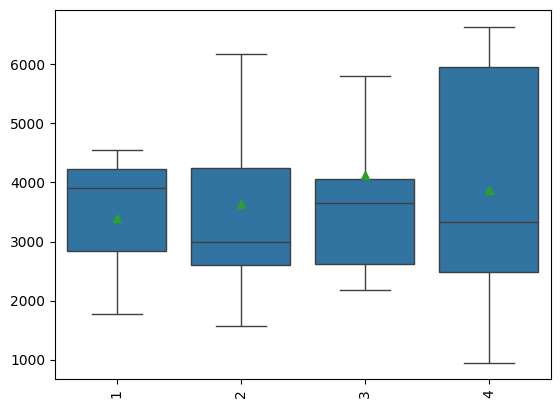

In [47]:
h= sns.boxplot(data = ar, x= kvm,y=kain,showmeans= True, showfliers=False)
h.tick_params(axis='x', rotation=90)

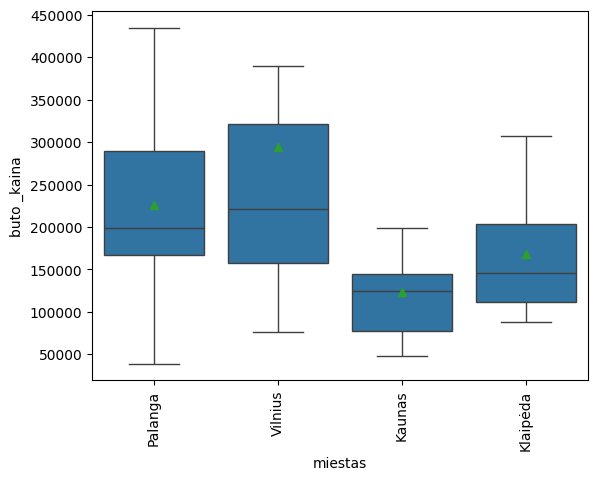

In [118]:
# Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
ar[['miestas','adr','ktr']]=ar['adresas'].str.split(',',expand=True)
ar
h= sns.boxplot(data = ar, x= 'miestas',y='buto _kaina',showmeans= True, showfliers=False)
h.tick_params(axis='x', rotation=90)

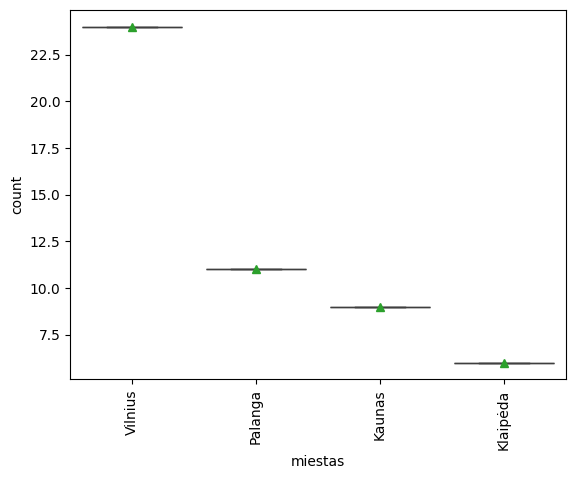

In [131]:
# pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?
visi=ar['miestas'].value_counts()
visi1=visi.reset_index()
visi1
h= sns.boxplot(data = visi1, x= 'miestas',y='count',showmeans= True, showfliers=False)
h.tick_params(axis='x', rotation=90)


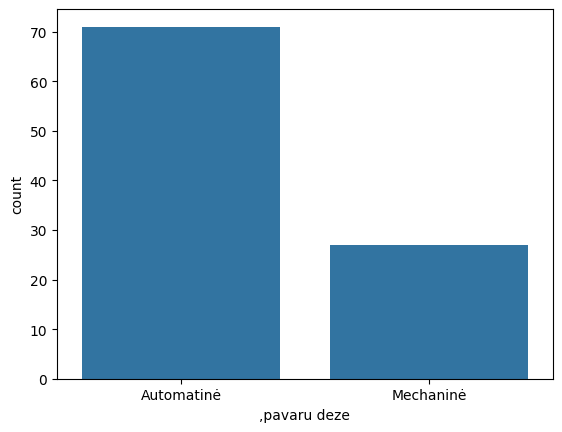

In [143]:
# jūsų atrankoje, kiek automobilių buvo au atomatu, mech, kokios jų buvo vidutinės kainos?
rez= pd.read_csv('rez3.csv', sep=';')

rez.head().reset_index()
visi1=rez[',pavaru deze'].value_counts().reset_index()
visi1
h= sns.barplot(data = visi1, x= ',pavaru deze',y='count')
vid= rez.groupby(',pavaru deze')['kaina'].mean()
# h.tick_params(axis='x', rotation=90)
#advanced: su pie plot atvaizduokite gamintojų užimamą rinkos dalį (5 didžiausi + visi kiti)

In [170]:
vid1=vid.reset_index()
visi2=visi1.reset_index()
p=[]
visi2['count'].head()
for i in visi2['count']:
    print(i)
    p.append(i)

71
27


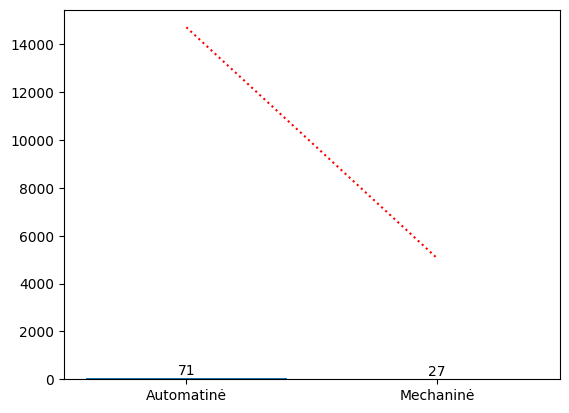

In [175]:
langas, grafikas = plt.subplots() # (1,2, figsize=[8,4.5]) #16:9
# # .plot() metodas

p=grafikas.bar(visi2[',pavaru deze'],visi2['count'])
grafikas.bar_label(p)
grafikas.plot(vid1[',pavaru deze'],vid1['kaina'], linestyle=':', color='red')
# grafikas.plot(a,d, label = r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker='D')

# P = axis.bar(x, x*0.75)
# axis.bar_label(P)


# #grafikas.legend(loc='upper left') 
# # varaintai be best - 'best', 'upper right', 'upper left', 'lower left', 
# #'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
# grafikas.set_xlabel("cia x asis")
# grafikas.set_ylabel('cia y asis')
# grafikas.set_title('cia pavadinimo komanda')
# grafikas.legend(loc=[1,1])
plt.show()

In [176]:
visi1.reset_index()
rez.head()

,kaina,",kuro tipas",",variklis",",pavaru deze",",rida",",tipas",",vietove",Unnamed: 7
0,11700,Dyzelinas,"3.0l.,210kW",Automatinė,279580,Visureigis / Krosoveris,Vilnius,NaN
1,11850,Benzinas,"2.0l.,180kW",Automatinė,100254,Visureigis / Krosoveris,Vilnius,NaN
2,12400,Dyzelinas,"3.0l.,195kW",Automatinė,283000,Kupė (Coupe),Kaunas,NaN
3,13500,Dyzelinas,"2.0l.,135kW",Automatinė,175000,Hečbekas,Kaunas,NaN
4,27500,Dyzelinas,"3.0l.,195kW",Automatinė,200000,Hečbekas,Marijampolė,NaN


In [183]:
#advanced: su pie plot atvaizduokite gamintojų užimamą rinkos dalį (5 didžiausi + visi kiti)
rezas= rez[',kuro tipas'].value_counts().reset_index()
rezas
# plt.pie(rezas)
# plt.show()

,",kuro tipas",count
0,Dyzelinas,63
1,Benzinas,23
2,Benzinas / elektra,5
3,Benzinas / elektra / dujos,2
4,Benzinas / dujos,2
5,Dyzelinas / elektra,1
6,"Elektra, 93 kWh",1
7,"Elektra, 62 kWh",1


In [17]:
def teigiami(sar:list):
    for i in sar:
        if i>0:
            return i
    
sara= [1,-5,6,-10,11]
sara.sort()
print(sara)

[-10, -5, 1, 6, 11]
